In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
industry = pd.read_csv("Desktop/EastCoastDataOpen/movie_industry.csv", encoding = "latin-1")
ratings = pd.read_csv("Desktop/EastCoastDataOpen/ratings.csv")
tags = pd.read_csv("Desktop/EastCoastDataOpen/tags.csv")
movies = pd.read_csv("Desktop/EastCoastDataOpen/movies.csv")

In [38]:
imdbRatings = industry["score"]
genre = industry["genre"]
budget = industry["budget"]
gross = industry["gross"]
tag = tags["tag"]
industry["profit"] = gross-budget

In [39]:
industry

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,4750497.0
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,28368.0
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,275000.0
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,25981.0


<AxesSubplot:>

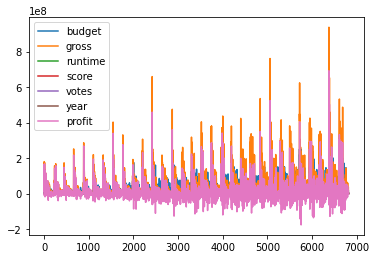

In [40]:
#overall graphs (year based ones later)
industry.plot()

<AxesSubplot:>

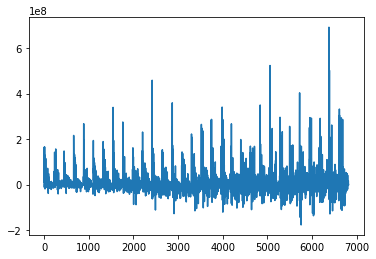

In [41]:
industry["profit"].plot()

<AxesSubplot:>

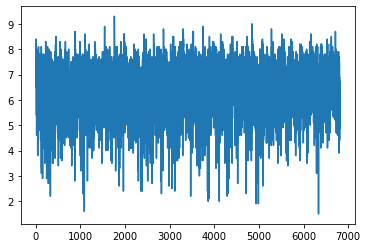

In [42]:
industry["score"].plot()

<AxesSubplot:>

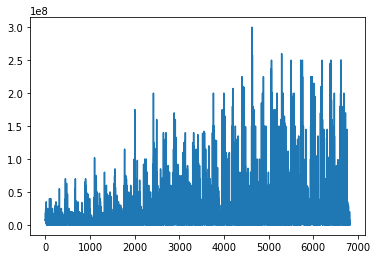

In [43]:
budget.plot()

<AxesSubplot:>

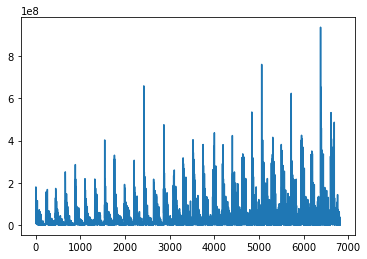

In [44]:
gross.plot()

<AxesSubplot:xlabel='score', ylabel='profit'>

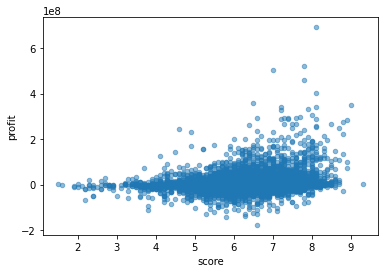

In [45]:
industry.plot.scatter(x="score", y="profit", alpha = 0.5)

<AxesSubplot:xlabel='budget', ylabel='profit'>

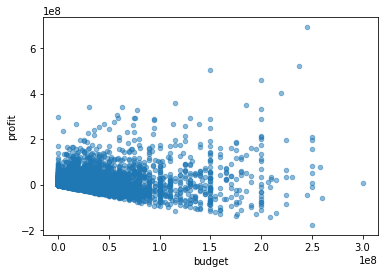

In [46]:
industry.plot.scatter(x="budget", y="profit", alpha = 0.5)

<AxesSubplot:xlabel='gross', ylabel='profit'>

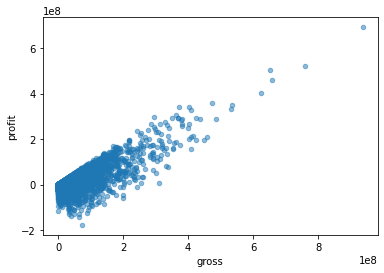

In [47]:
industry.plot.scatter(x="gross", y="profit", alpha = 0.5)

<AxesSubplot:>

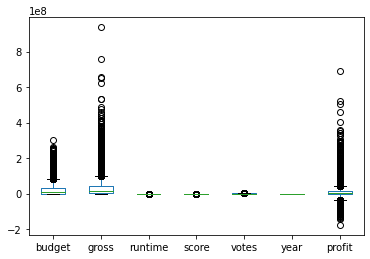

In [48]:
industry.plot.box()

<AxesSubplot:>

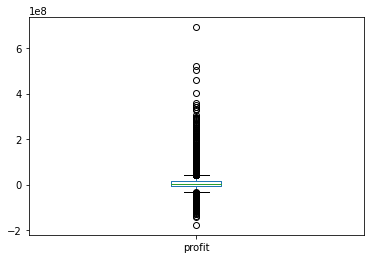

In [49]:
industry["profit"].plot.box()

<AxesSubplot:xlabel='year', ylabel='profit'>

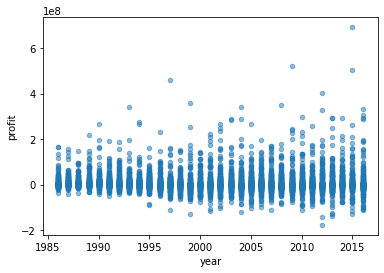

In [50]:
industry.plot.scatter(x="year", y="profit", alpha = 0.5)

<AxesSubplot:xlabel='year', ylabel='budget'>

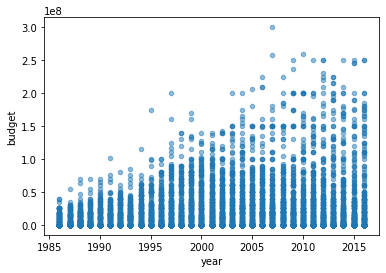

In [51]:
industry.plot.scatter(x="year", y="budget", alpha = 0.5)

<AxesSubplot:xlabel='year', ylabel='gross'>

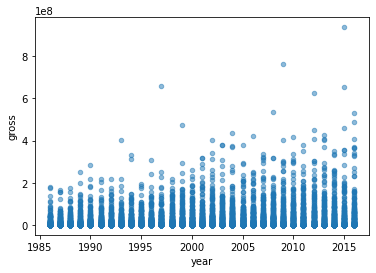

In [52]:
industry.plot.scatter(x="year", y="gross", alpha = 0.5)

<AxesSubplot:xlabel='year', ylabel='score'>

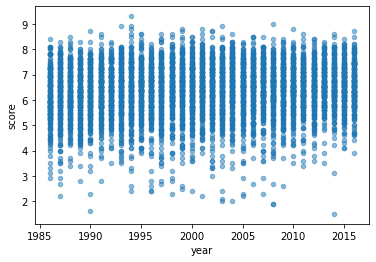

In [53]:
industry.plot.scatter(x="year", y="score", alpha = 0.5)

<AxesSubplot:xlabel='year', ylabel='genre'>

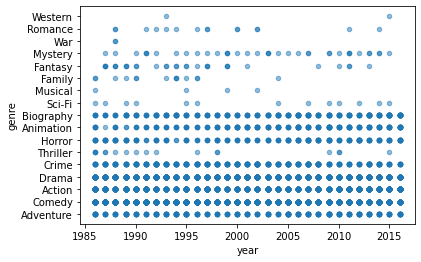

In [54]:
industry.plot.scatter(x="year", y="genre", alpha = 0.5)

<AxesSubplot:xlabel='profit', ylabel='genre'>

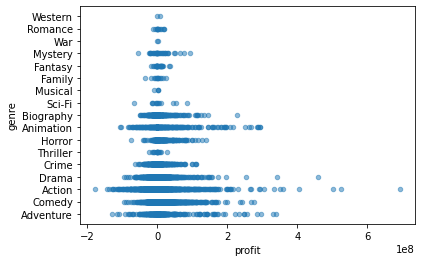

In [55]:
industry.plot.scatter(x="profit", y="genre", alpha = 0.5)

<AxesSubplot:xlabel='year', ylabel='profit'>

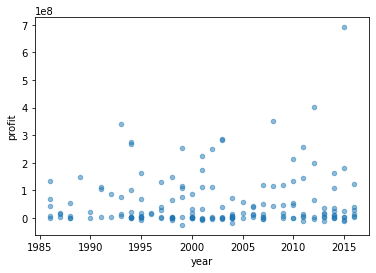

In [56]:
highRatings = industry[imdbRatings>8]
highRatings.plot.scatter(x="year", y="profit", alpha = 0.5)

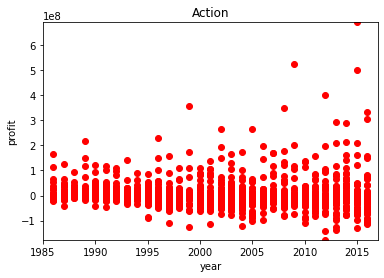

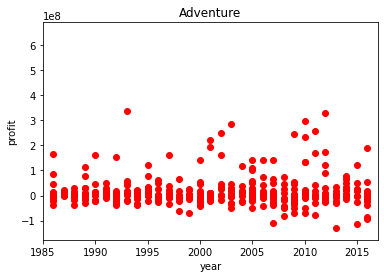

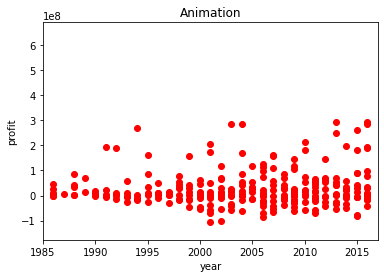

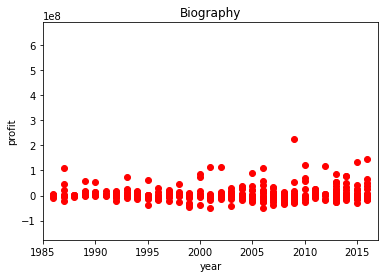

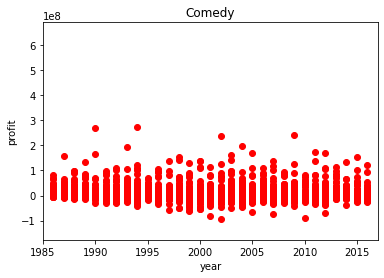

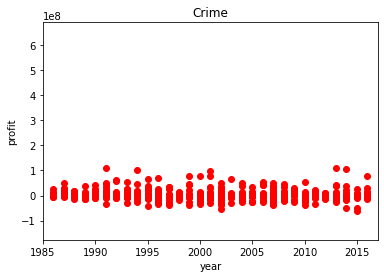

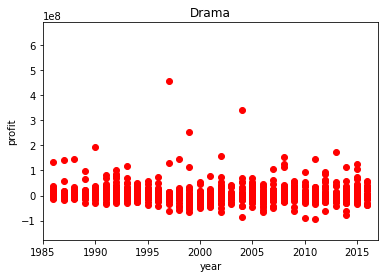

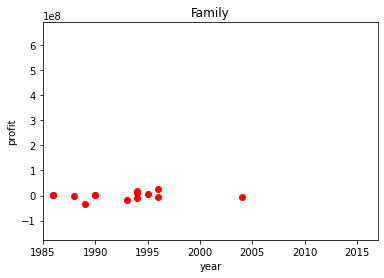

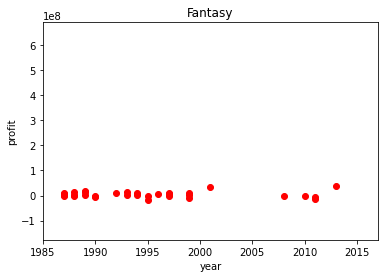

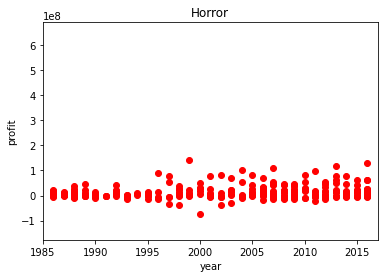

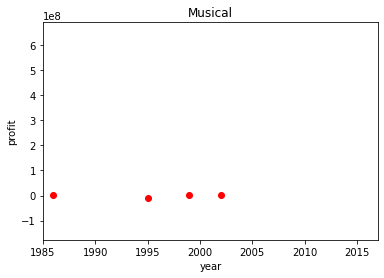

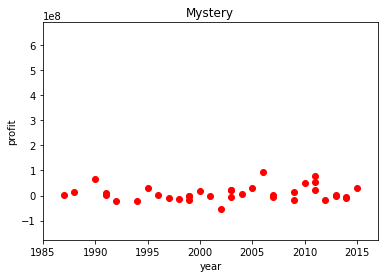

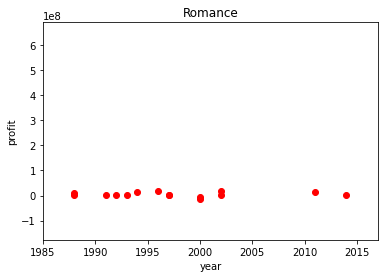

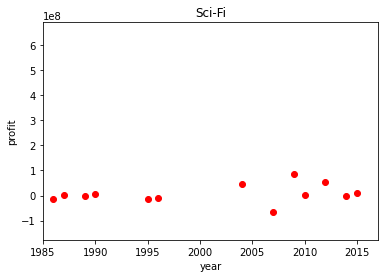

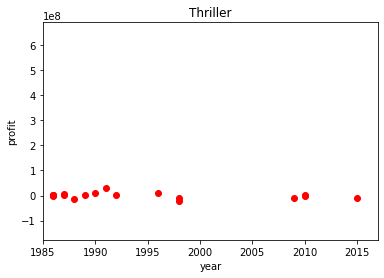

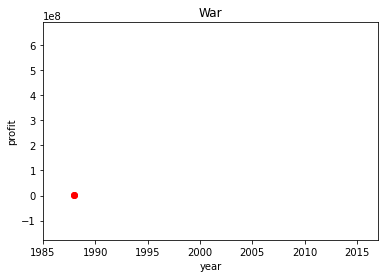

In [57]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(industry["profit"].min(),industry["profit"].max())
        plt.xlim(1985,2017)
        plt.show()
        
        genreDF = pd.DataFrame(gSortedProfits[startIndex:i])
        genreDF.describe()
        
       # print(gSortedProfits[startIndex:i].mean())
        currentGenre = gSortedGenres[i]
        startIndex = i
    

In [58]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        
        genreDF = pd.DataFrame(gSortedProfits[startIndex:i])
        print(currentGenre)
        print(genreDF.describe())
        
       # print(gSortedProfits[startIndex:i].mean())
        currentGenre = gSortedGenres[i]
        startIndex = i

Action
                  0
count  1.331000e+03
mean   7.303009e+06
std    5.841274e+07
min   -1.769219e+08
25%   -1.611057e+07
50%    2.211630e+05
75%    1.617812e+07
max    6.916622e+08
Adventure
                  0
count  3.920000e+02
mean   1.600220e+07
std    5.910115e+07
min   -1.298124e+08
25%   -9.309694e+06
50%    2.672602e+06
75%    2.162099e+07
max    3.394539e+08
Animation
                  0
count  2.770000e+02
mean   2.716138e+07
std    7.142624e+07
min   -1.048682e+08
25%   -8.944141e+06
50%    5.017246e+06
75%    4.508530e+07
max    2.933843e+08
Biography
                  0
count  3.590000e+02
mean   7.048317e+06
std    2.968493e+07
min   -4.899996e+07
25%   -6.453068e+06
50%    1.029949e+06
75%    1.173783e+07
max    2.269595e+08
Comedy
                  0
count  2.080000e+03
mean   1.081989e+07
std    3.063731e+07
min   -9.557992e+07
25%   -1.738301e+06
50%    1.790690e+06
75%    1.652558e+07
max    2.752522e+08
Crime
                  0
count  5.220000e+02
mean   3.2

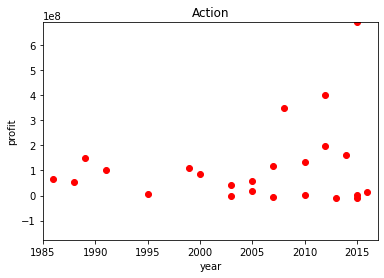

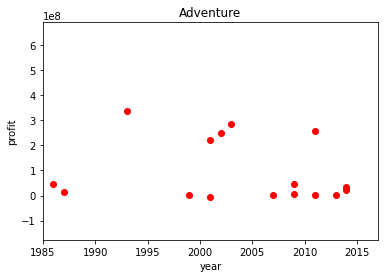

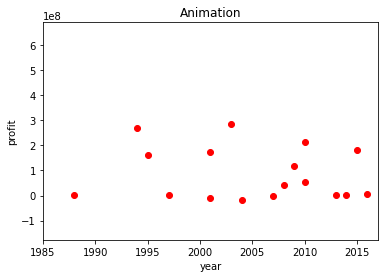

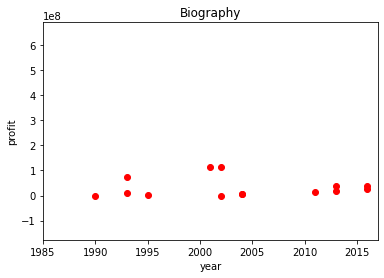

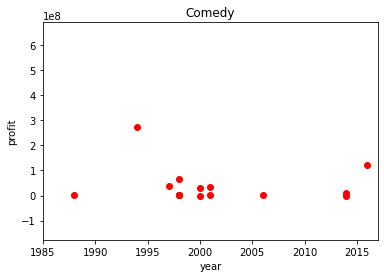

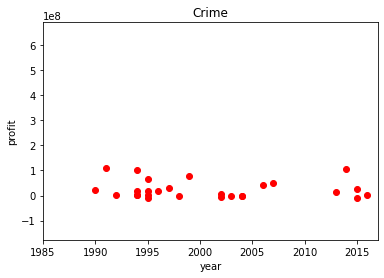

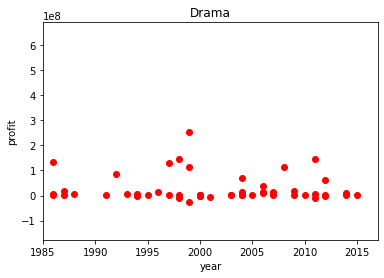

In [59]:
highRatingsGenreSorted = highRatings.sort_values(by=["genre"])
ghrSortedProfits = np.array(highRatingsGenreSorted["profit"])
ghrSortedGenres = np.array(highRatingsGenreSorted["genre"])
ghrSortedYear = np.array(highRatingsGenreSorted["year"])

currentGenreHR = "Action"
startIndexHR = 0
for i in range(len(ghrSortedGenres)):
    if ghrSortedGenres[i] != currentGenreHR:
        plt.figure()
        plt.plot(ghrSortedYear[startIndexHR:i],ghrSortedProfits[startIndexHR:i], 'ro')
        plt.title(currentGenreHR)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(industry["profit"].min(),industry["profit"].max())
        plt.xlim(1985,2017)
        plt.show()
        currentGenreHR = ghrSortedGenres[i]
        startIndexHR = i

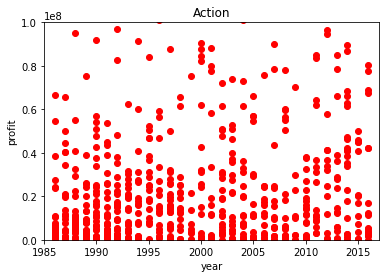

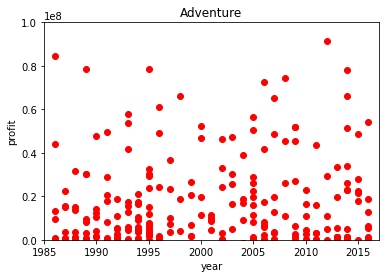

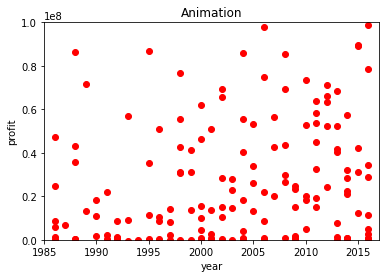

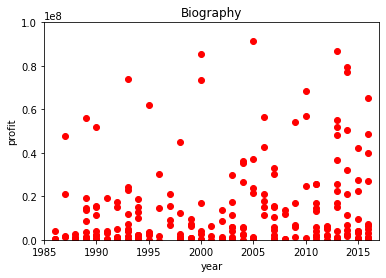

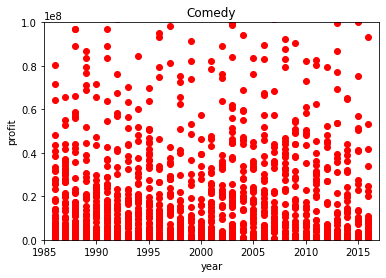

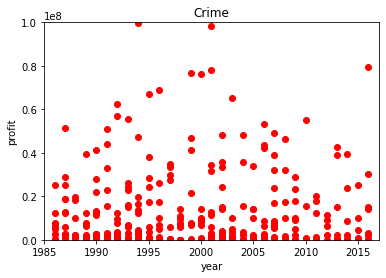

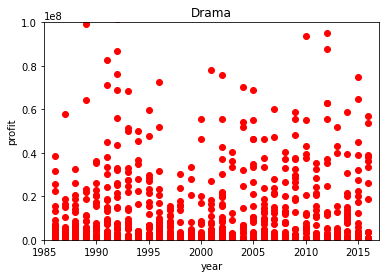

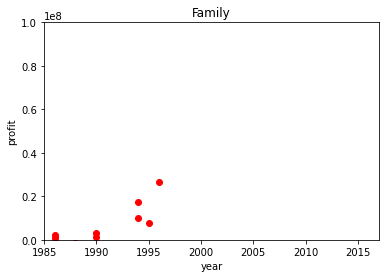

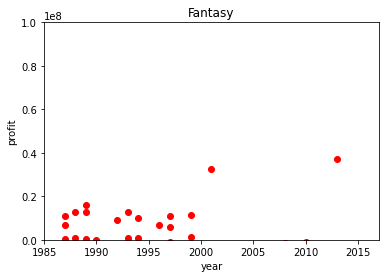

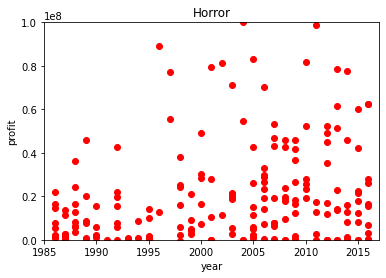

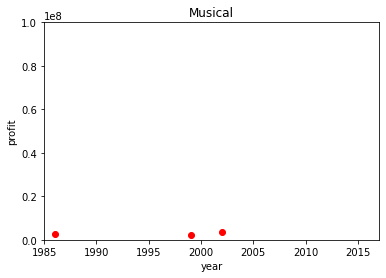

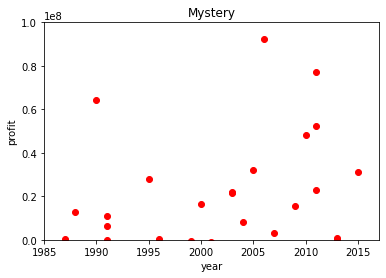

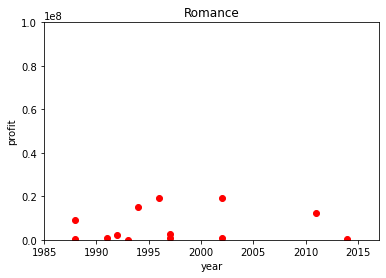

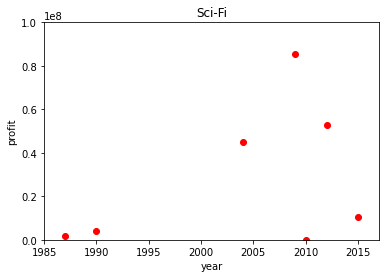

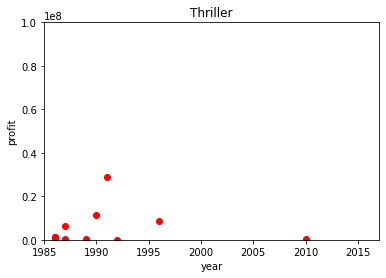

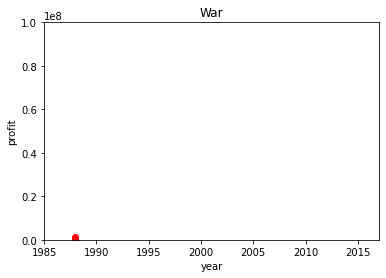

In [60]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(0,1e8)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

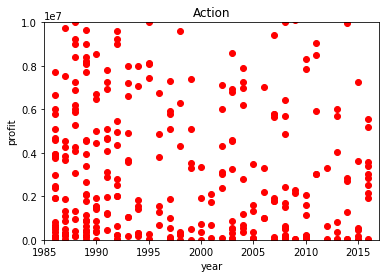

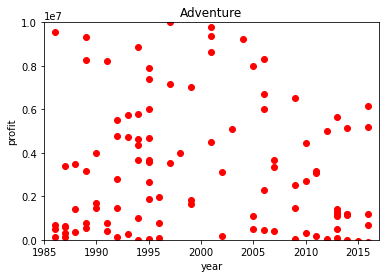

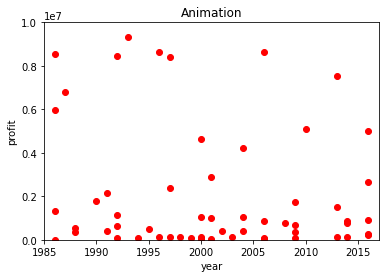

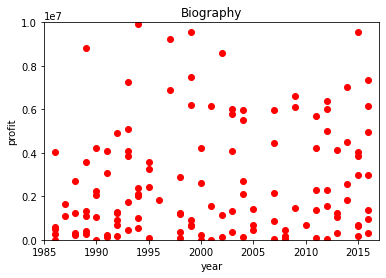

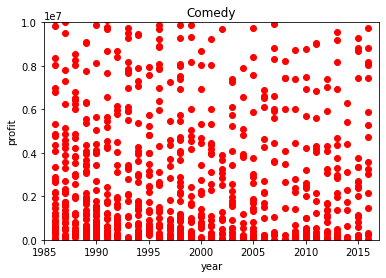

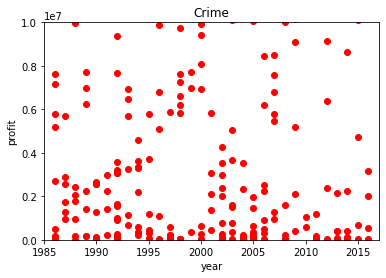

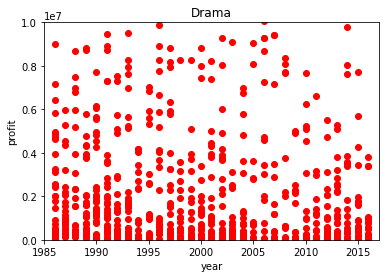

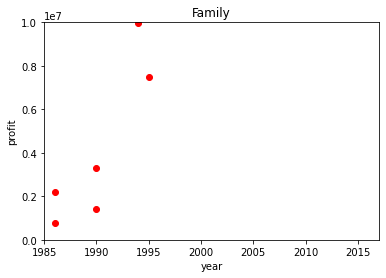

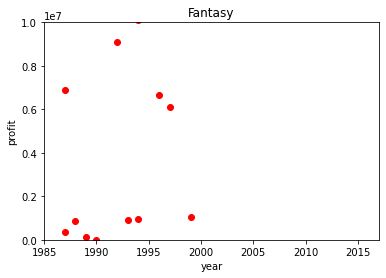

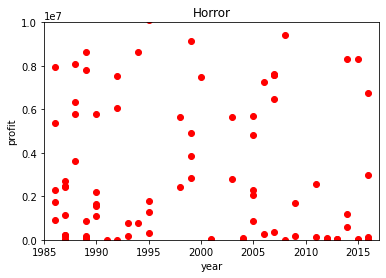

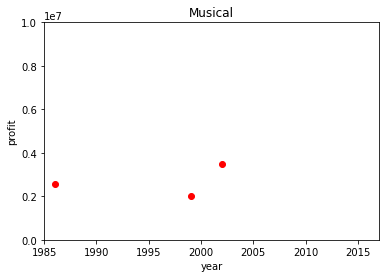

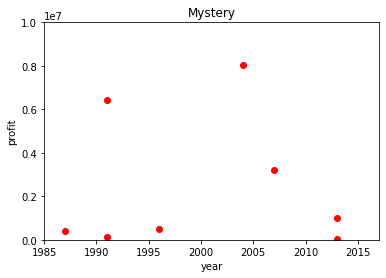

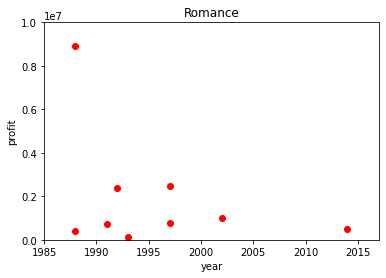

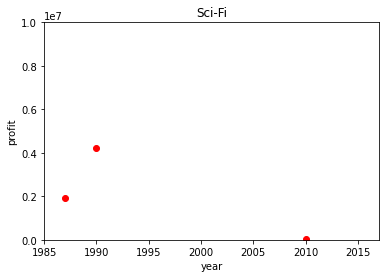

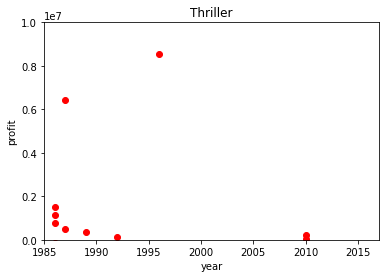

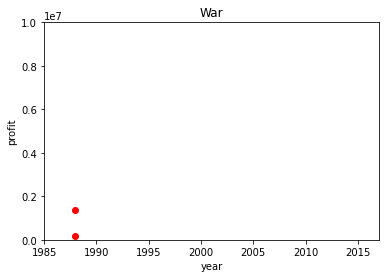

In [61]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(0,1e7)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

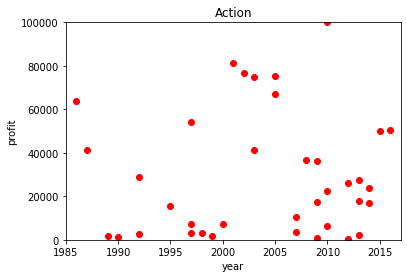

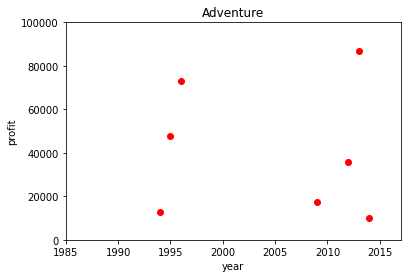

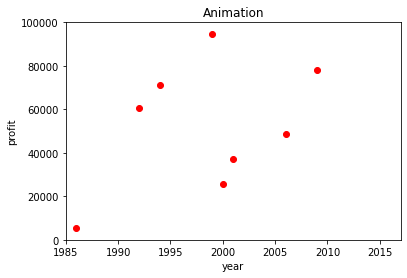

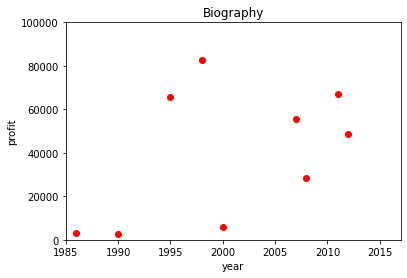

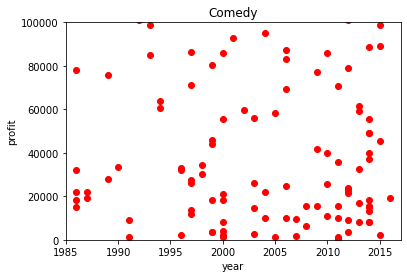

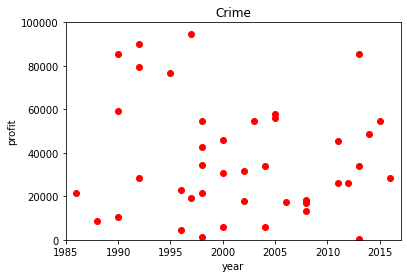

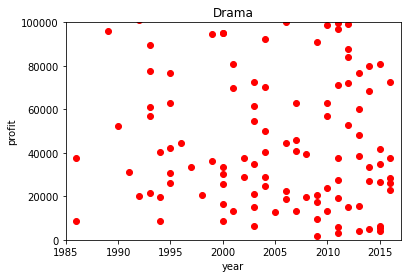

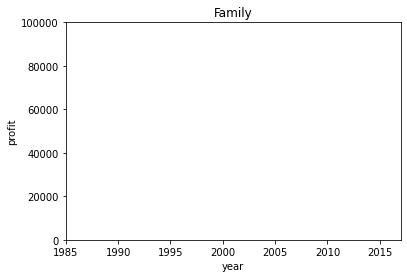

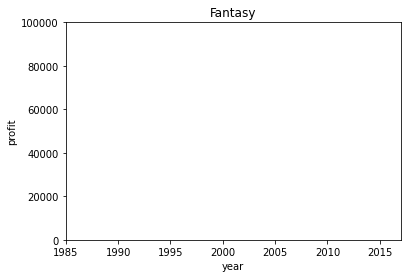

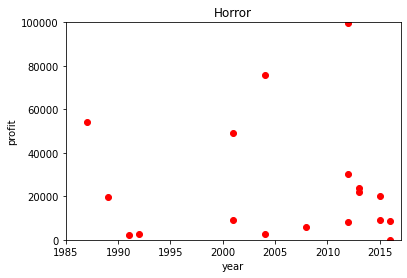

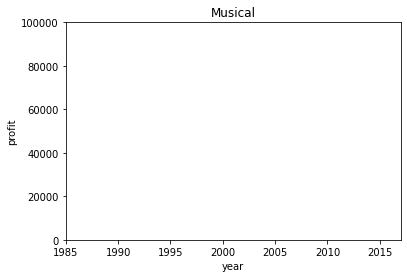

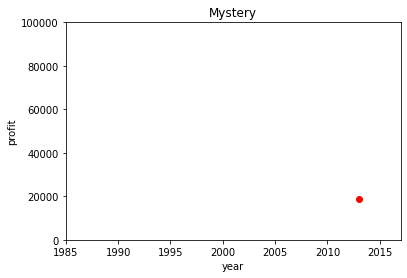

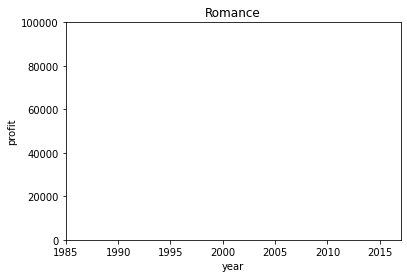

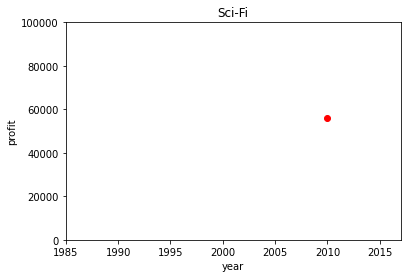

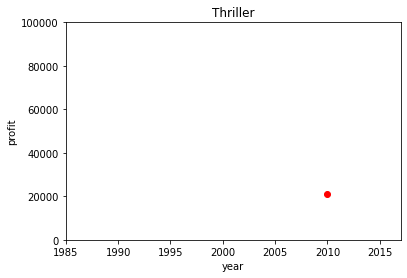

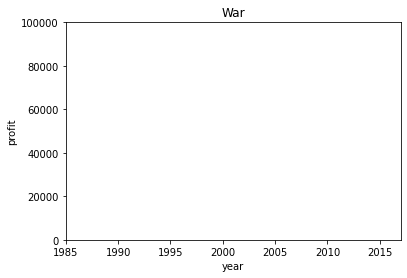

In [62]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(0,1e5)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

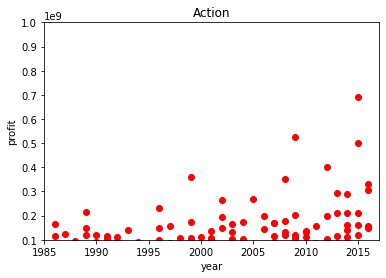

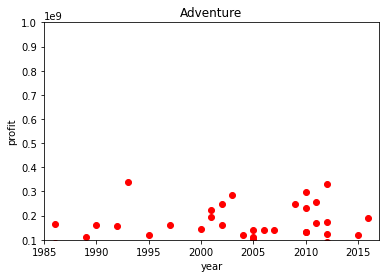

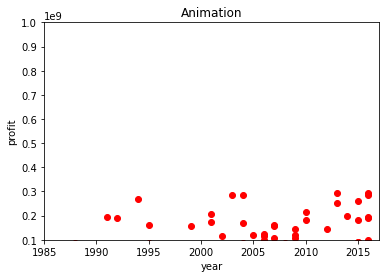

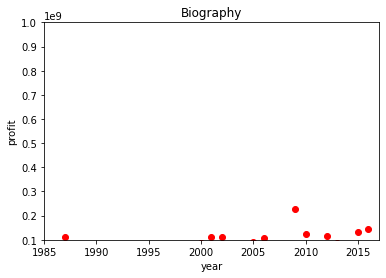

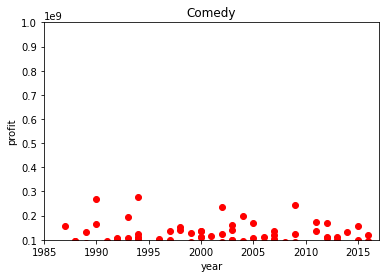

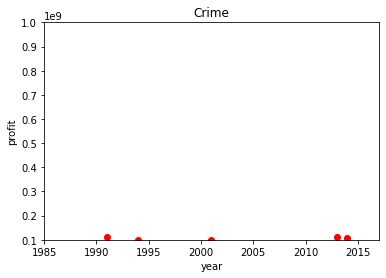

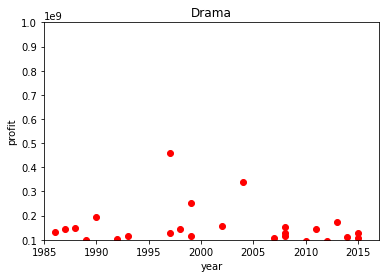

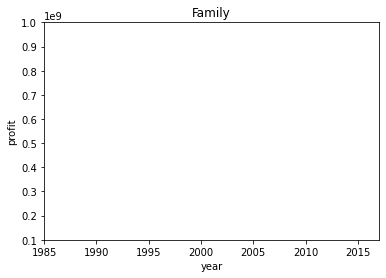

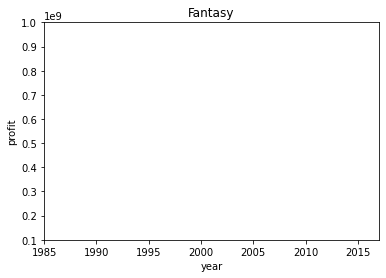

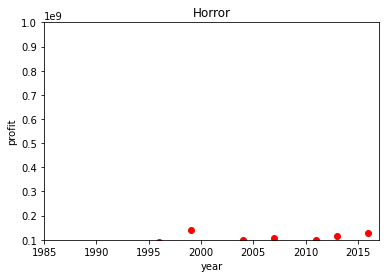

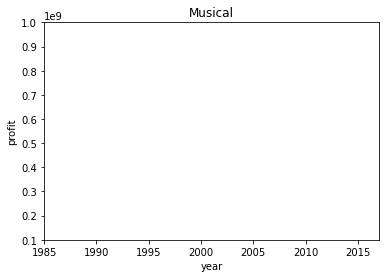

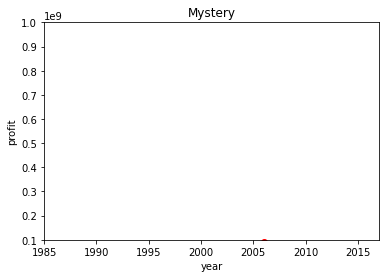

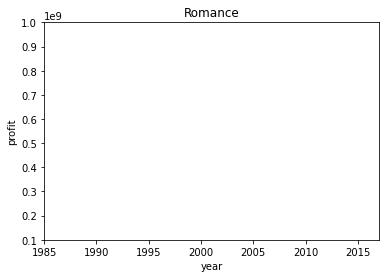

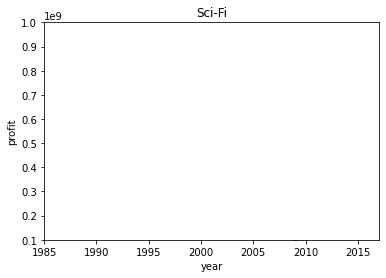

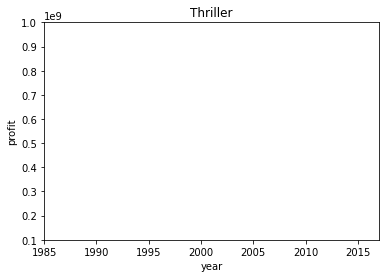

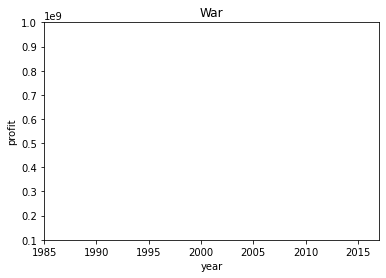

In [63]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(1e8,1e9)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

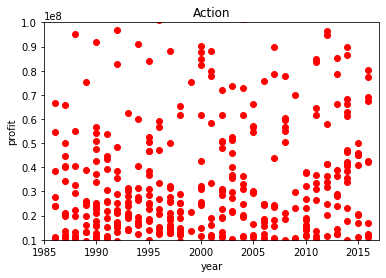

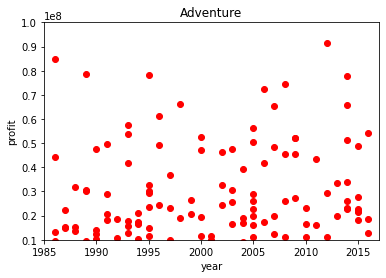

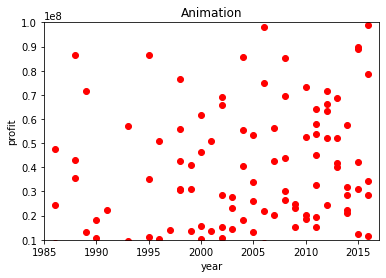

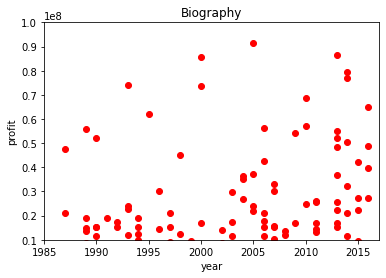

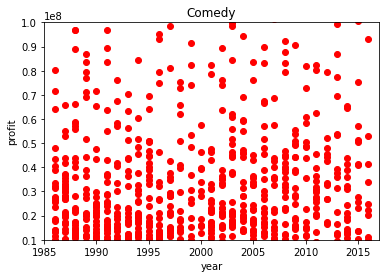

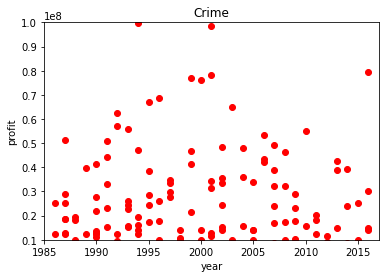

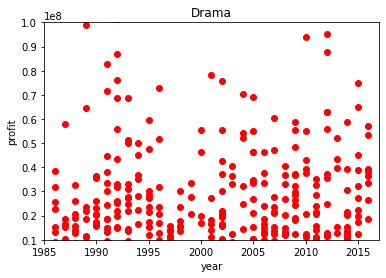

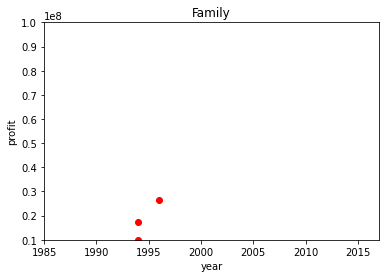

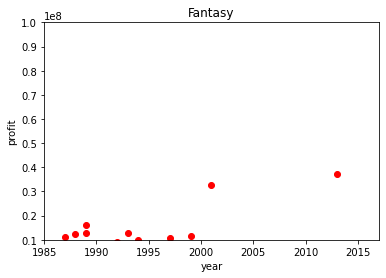

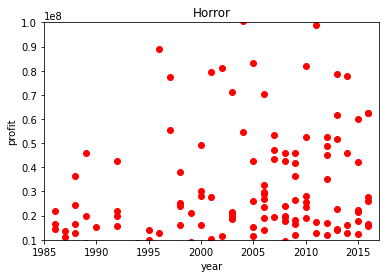

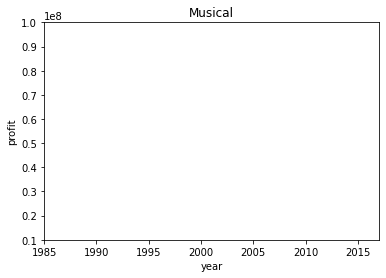

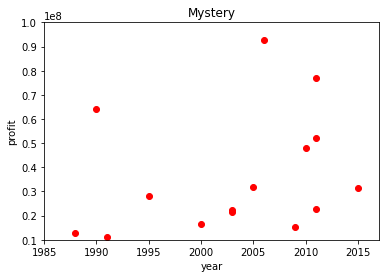

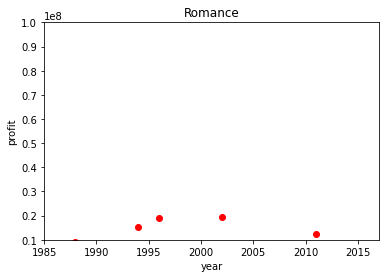

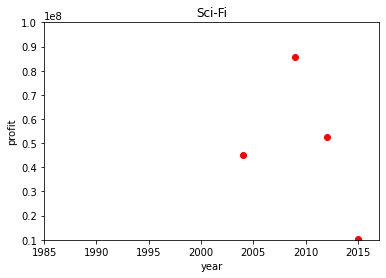

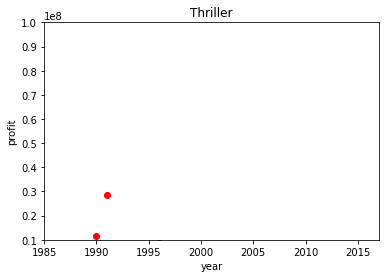

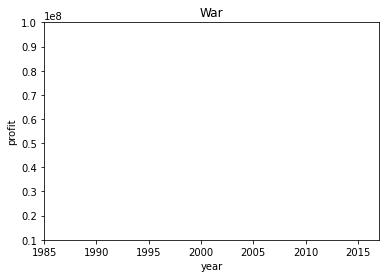

In [64]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(1e7,1e8)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

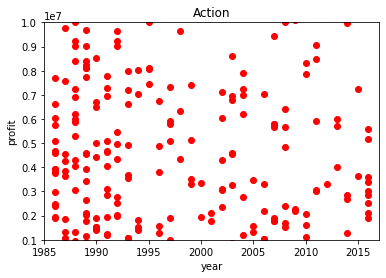

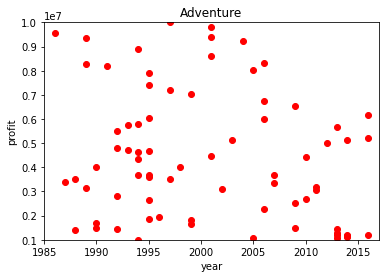

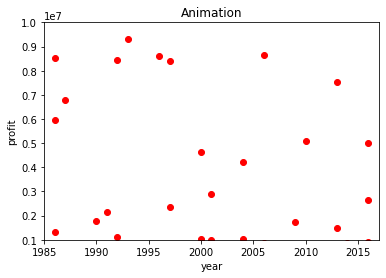

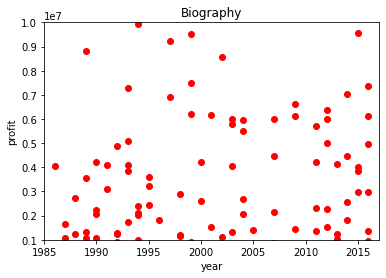

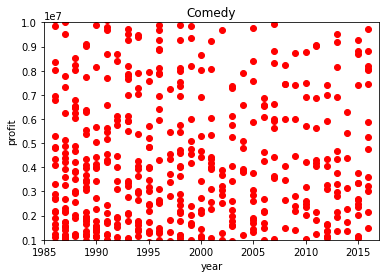

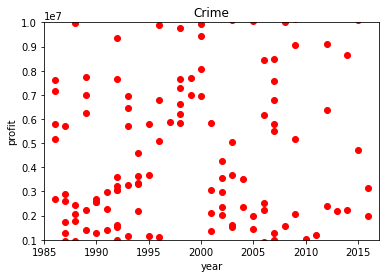

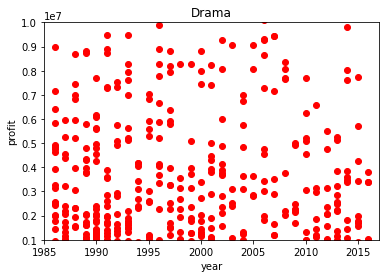

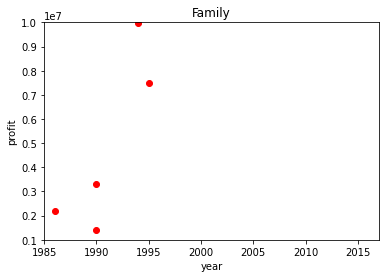

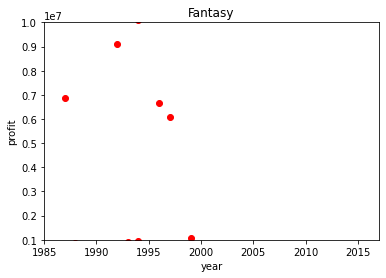

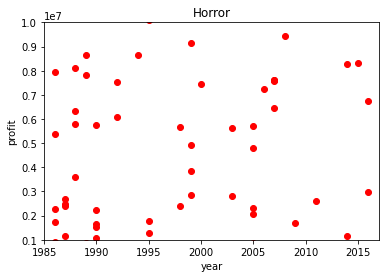

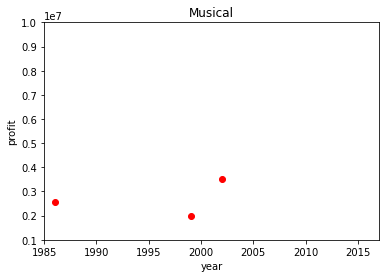

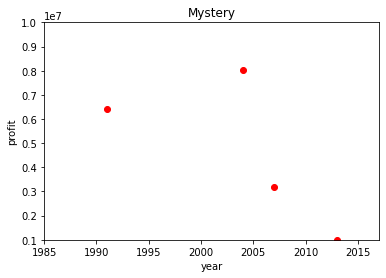

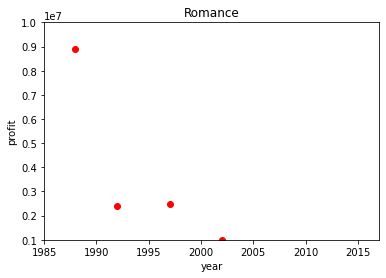

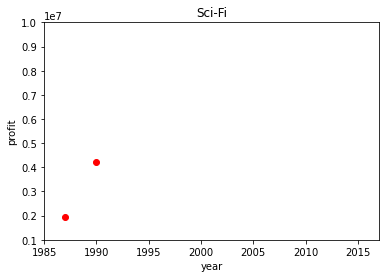

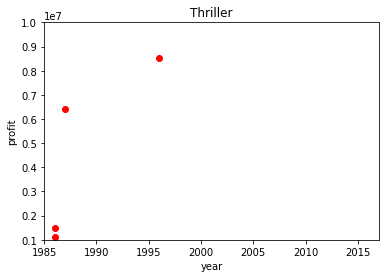

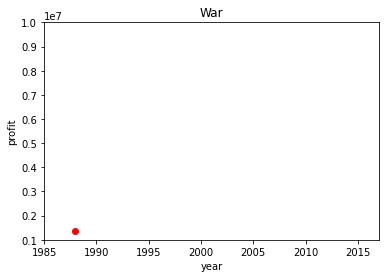

In [65]:
industryGenreSorted = industry.sort_values(by=["genre"])
gSortedProfits = np.array(industryGenreSorted["profit"])
gSortedGenres = np.array(industryGenreSorted["genre"])
gSortedYear = np.array(industryGenreSorted["year"])

currentGenre = "Action"
startIndex = 0
for i in range(len(gSortedGenres)):
    if gSortedGenres[i] != currentGenre:
        plt.figure()
        plt.plot(gSortedYear[startIndex:i],gSortedProfits[startIndex:i], 'ro')
        plt.title(currentGenre)
        plt.xlabel('year')
        plt.ylabel('profit')
        plt.ylim(1e6,1e7)
        plt.xlim(1985,2017)
        plt.show()
        currentGenre = gSortedGenres[i]
        startIndex = i
    

In [66]:
sortedTagsDF = tags.sort_values(by=["tag"])
sortedTags = np.array(sortedTagsDF["tag"])
currentTag = ""
tagCount = 0
popularTags = []
for i in sortedTags:
    if i == currentTag:
        tagCount+=1
    else:
        if tagCount>500:
            popularTags.append(i)
        currentTag = i
        tagCount = 0
print(popularTags)
print(len(popularTags))

['1970s humour', '1981', '70mm blowup', 'Action / Violence', 'Adventure, Action, Science Fiction', 'Al Pacino Vs Robert De Niro', 'Arnold Vosloo', 'Atom Egoyan', 'BD-Video', 'BD-Video 3D', 'Bechdel Test:Neutral', 'Bechdel Test:Pass (barely)', 'Beth Behrs', 'Bill Murray is the comedy king in this great movie', 'Brad Renfro', 'British Academy of Film and Television Arts Award Winner', 'Bruce Willis is dead', 'CNC', 'Christian Carion', 'Christians are morons', 'Christmas Eve', 'Christopher Nolanï¼Œbatman', 'Clint Howard', 'Coen brothers', 'Comedy Horror', "Critic's Choice Awards - Best Actress", 'DVD-Video', 'DVD1', 'Disney (Touchstone)', 'Drama2', 'Edward Norton unbelievably good', 'England in 1900', 'French Canadian', 'Funny As Hell', 'George Coulouris', 'Harrison Ford great movies', 'Hayato Ichihara', 'Japanese', 'Jim Carrey being Jim Carrey', 'Johnny Depp***', 'Keaton', 'Kevin Spacey was on a roll', 'Leonardo Nam', 'Martin Semmelrogge', 'Marvel Cinematic Universe', 'Matt Damon(written

In [67]:
sortedIDsDF = tags.sort_values(by=["movieId"])
sortedIDs = np.array(sortedIDsDF["movieId"])
currentID = 0
IDCount = 0
popularIDs = []
for i in sortedIDs:
    if i == currentID:
        IDCount+=1
    else:
        if IDCount>500:
            popularIDs.append(i)
        currentID = i
        IDCount = 0
print(popularIDs)
print(len(popularIDs))

[2, 7, 33, 48, 52, 111, 112, 151, 216, 261, 294, 297, 319, 357, 365, 481, 528, 542, 552, 590, 594, 609, 751, 779, 781, 859, 905, 913, 925, 1037, 1081, 1090, 1139, 1194, 1197, 1198, 1199, 1200, 1201, 1202, 1204, 1207, 1209, 1211, 1214, 1215, 1220, 1223, 1241, 1247, 1253, 1259, 1266, 1271, 1275, 1292, 1528, 1585, 1619, 1626, 1646, 1654, 1683, 1707, 1722, 1733, 1749, 1922, 1962, 1969, 2029, 2175, 2233, 2289, 2292, 2325, 2330, 2503, 2543, 2572, 2629, 2658, 2693, 2713, 2763, 2859, 2917, 2961, 2998, 3001, 3148, 3177, 3536, 3579, 3794, 3950, 3997, 4012, 4023, 4028, 4227, 4263, 4307, 4721, 4849, 4874, 4879, 4887, 4897, 4964, 4974, 4976, 4980, 4994, 4996, 5379, 5419, 5446, 5619, 5903, 5906, 5953, 5972, 5990, 5996, 6017, 6325, 6366, 6378, 6503, 6540, 6713, 6871, 6875, 6935, 6943, 7100, 7148, 7154, 7255, 7362, 7439, 8534, 8645, 8785, 8875, 8915, 8951, 8958, 8962, 27776, 27905, 30712, 30812, 31660, 32591, 33008, 33495, 33799, 34411, 35843, 36531, 38086, 39191, 40679, 40817, 41569, 44193, 44197, 44

In [70]:
popularMovieNames = []
sortedMovies = movies.sort_values(by=["movieId"])
sortedMovieIds = sortedMovies["movieId"]
sortedMovieTitles = sortedMovies["title"]
popularIDIndex = 0
for i in range(len(sortedMovieIds)):
    if popularIDIndex < len(popularIDs) and sortedMovieIds[i] == popularIDs[popularIDIndex]:
        popularMovieNames.append(sortedMovieTitles[i])
        popularIDIndex+=1
print(popularMovieNames)

['Jumanji (1995)', 'Sabrina (1995)', 'Wings of Courage (1995)', 'Pocahontas (1995)', 'Mighty Aphrodite (1995)', 'Taxi Driver (1976)', 'Rumble in the Bronx (Hont faan kui) (1995)', 'Rob Roy (1995)', 'Billy Madison (1995)', 'Little Women (1994)', 'Perez Family, The (1995)', 'Panther (1995)', 'Shallow Grave (1994)', 'Four Weddings and a Funeral (1994)', 'Little Buddha (1993)', 'Kalifornia (1993)', 'Scout, The (1994)', 'Son in Law (1993)', 'Three Musketeers, The (1993)', 'Dances with Wolves (1990)', 'Snow White and the Seven Dwarfs (1937)', 'Homeward Bound II: Lost in San Francisco (1996)', 'Careful (1992)', "'Til There Was You (1997)", 'Stealing Beauty (1996)', 'Hippie Revolution, The (1996)', 'It Happened One Night (1934)', 'Maltese Falcon, The (1941)', 'Golden Earrings (1947)', 'Lawnmower Man, The (1992)', 'Victor/Victoria (1982)', 'Platoon (1986)', 'Everything Relative (1996)', "Cheech and Chong's Up in Smoke (1978)", 'Princess Bride, The (1987)', 'Raiders of the Lost Ark (Indiana Jone

In [72]:
taggedMovies = industry[industry["name"].isin(popularMovieNames)]
print(taggedMovies)

Empty DataFrame
Columns: [budget, company, country, director, genre, gross, name, rating, released, runtime, score, star, votes, writer, year, profit]
Index: []
